# Importing Netflix movies txt data and converting to DataFrame

In [76]:
import os
import pandas as pd
import numpy as np

# Reading all the txt files in the folder and storing them in a csv file

if not os.path.isfile('C:/Users/gatea/Documents/Machine Learning Projects/Netflix/data.csv'):
    data = open('data.csv', mode='w')
    
    row = list()
    files = [
        'C:/Users/gatea/Documents/Machine Learning Projects/Netflix/combined_data_1.txt',
        ]
    for file in files:
        print("Reading ratings from {}\n".format(file))
        with open(file) as f:
            for line in f: 
                line = line.strip()
                if line.endswith(':'):
                    movie_id = line.replace(':', '')
                else:
                    row = [x for x in line.split(',')]
                    row.insert(0, movie_id)
                    data.write(','.join(row))
                    data.write('\n')
    data.close()
    
df = pd.read_csv('C:/Users/gatea/Documents/Machine Learning Projects/Netflix/data.csv', sep=',', 
    names=['movieid', 'user', 'rating', 'date'])

df.date = pd.to_datetime(df.date)
df['month'] = pd.DatetimeIndex(df['date']).month
df['year'] = pd.DatetimeIndex(df['date']).year
df['day'] = pd.DatetimeIndex(df['date']).day
df

,movieid,user,rating,date,month,year,day
0,1,1488844,3,2005-09-06,9,2005,6
1,1,822109,5,2005-05-13,5,2005,13
2,1,885013,4,2005-10-19,10,2005,19
3,1,30878,4,2005-12-26,12,2005,26
4,1,823519,3,2004-05-03,5,2004,3
...,...,...,...,...,...,...,...
51031350,9210,2420260,1,2003-12-01,12,2003,1
51031351,9210,761176,3,2004-06-06,6,2004,6
51031352,9210,459277,3,2005-02-25,2,2005,25
51031353,9210,2407365,4,2005-04-29,4,2005,29


# Merging movies dataset to map Movie names to Movie ids

In [3]:
movie_data = pd.read_csv('C:/Users/gatea/Documents/Machine Learning Projects/Netflix/movie_titles.csv', encoding=('latin-1'))

df=pd.merge(df, movie_data, how='left', on=['movieid'])
df = df.loc[df['month']==12]
df = df.loc[df['day']==25]
df

,movieid,user,rating,date,month,year,day,movieyear,moviename
2946,5,162804,5,2004-12-25,12,2004,25,2004.0,The Rise and Fall of ECW
3425,5,2461719,4,2004-12-25,12,2004,25,2004.0,The Rise and Fall of ECW
4123,6,2209618,3,2003-12-25,12,2003,25,1997.0,Sick
4558,6,539019,5,2005-12-25,12,2005,25,1997.0,Sick
8464,8,349234,1,2005-12-25,12,2005,25,2004.0,What the #$*! Do We Know!?
...,...,...,...,...,...,...,...,...,...
51027222,9208,854459,5,2003-12-25,12,2003,25,1985.0,Pale Rider
51027937,9208,2110645,2,2002-12-25,12,2002,25,1985.0,Pale Rider
51030364,9210,2354125,5,2005-12-25,12,2005,25,2002.0,Beijing Bicycle
51030642,9210,1753104,3,2002-12-25,12,2002,25,2002.0,Beijing Bicycle


# Subsetting dataset to identify Customers and the Movies watched by them

In [4]:
col=['movieid', 'rating', 'date', 'month', 'year', 'day','movieyear'] 
#dropping unwanted col
df2=df.drop(columns=col, axis=1)
df2.set_index('user')

,moviename
user,
162804,The Rise and Fall of ECW
2461719,The Rise and Fall of ECW
2209618,Sick
539019,Sick
349234,What the #$*! Do We Know!?
...,...
854459,Pale Rider
2110645,Pale Rider
2354125,Beijing Bicycle


# Converting to list

In [5]:
movies = df2.groupby('user')['moviename'].apply(list).tolist()
movies

[['Collateral'],
 ['Shrek 2'],
 ['Will & Grace: Season 3'],
 ['Back to the Future Part III',
  'Beverly Hills Cop III',
  'The Best of Friends: Season 2',
  'Bad Boys II',
  'Patch Adams',
  'The Mask: Special Edition',
  'Erin Brockovich',
  'Back to the Future Part II',
  'My Cousin Vinny',
  'Friends: Season 4',
  'Star Wars: Episode V: The Empire Strikes Back',
  'Michael',
  'Rush Hour',
  'Good Morning',
  'The Lord of the Rings: The Fellowship of the Ring: Extended Edition',
  'Beverly Hills Cop II',
  'Doctor Dolittle',
  'Top Gun',
  'Apollo 13',
  'Cinderella: Special Edition',
  'Friends: Season 5',
  'Ice Age',
  'Private Benjamin'],
 ['Dogma', 'Northern Exposure: Season 1'],
 ['Walking with Dinosaurs'],
 ['Insomnia'],
 ['Chris Rock: Bring the Pain'],
 ['Freaky Friday'],
 ['Seven Samurai',
  'The Wedding Planner',
  'Man on Fire',
  'About a Boy',
  'Shrek 2',
  'Miss Congeniality',
  'Pretty Woman',
  'Entrapment',
  'Men of Honor'],
 ['The Unbelievable Truth'],
 ['The Bod

# Importing necessary libraries

In [6]:
from mlxtend.preprocessing import TransactionEncoder 
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# Encoding Dataset

In [7]:
encoder = TransactionEncoder().fit(movies)
onehot = encoder.transform(movies)
onehot = pd.DataFrame(onehot, columns = encoder.columns_)
onehot

,'N Sync: Making of the Tour,'N Sync: PopOdyssey Live,...And Justice for All,...And Then Came Summer,.hack//SIGN,10,10 Things I Hate About You,10.5,101 Dalmatians II: Patch's London Adventure,11-Sep,...,Zatoichi the Outlaw,Zatoichi's Conspiracy,Zatoichi: The Festival of Fire,Zeus and Roxanne,Zhou Yu's Train,Ziegfeld Girl,Zig Zag: Special Edition,Zombie,Zorro,s-Cry-ed
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12269,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
12270,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
12271,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
12272,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# Applying Apriori Algorithm

### Deriving qualified rules

In [8]:
frequent_items = apriori(onehot, min_support = 0.005, max_len = 4, use_colnames = True)
print(len(frequent_items))
frequent_items

244


,support,itemsets
0,0.005377,(2 Fast 2 Furious)
1,0.006925,(28 Days Later)
2,0.013850,(50 First Dates)
3,0.011977,(A Beautiful Mind)
4,0.007007,(A Bug's Life)
...,...,...
239,0.007658,"(Miss Congeniality, Pretty Woman)"
240,0.007170,"(Miss Congeniality, The Wedding Planner)"
241,0.008147,"(Miss Congeniality, What Women Want)"
242,0.005133,"(Pretty Woman, The Wedding Planner)"


In [12]:
rules = association_rules(frequent_items, metric = 'support', min_threshold = 0.005)
print(len(rules))
rules

22


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Billy Madison),(Happy Gilmore),0.010510,0.019554,0.005866,0.558140,28.544186,0.005661,2.218905
1,(Happy Gilmore),(Billy Madison),0.019554,0.010510,0.005866,0.300000,28.544186,0.005661,1.413557
2,(The Bourne Identity),(Catch Me If You Can),0.015969,0.014828,0.005540,0.346939,23.397399,0.005303,1.508544
3,(Catch Me If You Can),(The Bourne Identity),0.014828,0.015969,0.005540,0.373626,23.397399,0.005303,1.570997
4,(Collateral),(I),0.032915,0.026805,0.005377,0.163366,6.094706,0.004495,1.163228
5,(I),(Collateral),0.026805,0.032915,0.005377,0.200608,6.094706,0.004495,1.209775
6,(Miss Congeniality),(Entrapment),0.023709,0.014991,0.006192,0.261168,17.421635,0.005837,1.333198
7,(Entrapment),(Miss Congeniality),0.014991,0.023709,0.006192,0.413043,17.421635,0.005837,1.663311
8,(Miss Congeniality),(Men of Honor),0.023709,0.013199,0.006925,0.292096,22.130796,0.006612,1.393977
9,(Men of Honor),(Miss Congeniality),0.013199,0.023709,0.006925,0.524691,22.130796,0.006612,2.054016


### Visualizing support metric

<AxesSubplot:xlabel='antecedents', ylabel='consequents'>

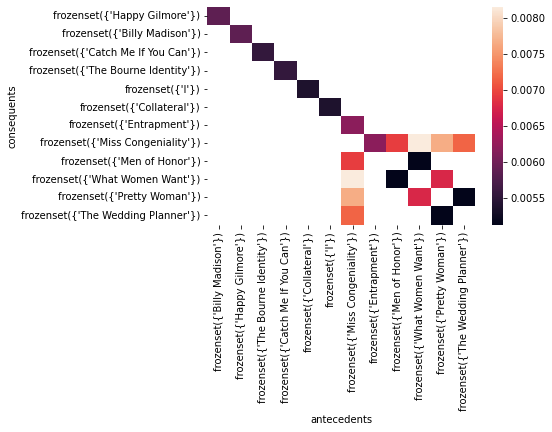

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

support_table = rules.pivot(index = 'consequents', columns = 'antecedents', values = 'support')
sns.heatmap(support_table)

### Adding Zhang's metric to the dataset

In [31]:
rules.insert(8,'Zhang metric',0)
rules['Zhang metric'] = rules.apply(lambda x : ((x['support'] - x['antecedent support'] * x['consequent support']) / max((x['support']*(1 - x['antecedent support'])), (x['antecedent support'] * x['consequent support'] - x['consequent support']))), axis=1)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,Zhang metric,conviction
0,(Billy Madison),(Happy Gilmore),0.010510,0.019554,0.005866,0.558140,28.544186,0.005661,0.975216,2.218905
1,(Happy Gilmore),(Billy Madison),0.019554,0.010510,0.005866,0.300000,28.544186,0.005661,0.984211,1.413557
2,(The Bourne Identity),(Catch Me If You Can),0.015969,0.014828,0.005540,0.346939,23.397399,0.005303,0.972794,1.508544
3,(Catch Me If You Can),(The Bourne Identity),0.014828,0.015969,0.005540,0.373626,23.397399,0.005303,0.971668,1.570997
4,(Collateral),(I),0.032915,0.026805,0.005377,0.163366,6.094706,0.004495,0.864374,1.163228
5,(I),(Collateral),0.026805,0.032915,0.005377,0.200608,6.094706,0.004495,0.858947,1.209775
6,(Miss Congeniality),(Entrapment),0.023709,0.014991,0.006192,0.261168,17.421635,0.005837,0.965491,1.333198
7,(Entrapment),(Miss Congeniality),0.014991,0.023709,0.006192,0.413043,17.421635,0.005837,0.956946,1.663311
8,(Miss Congeniality),(Men of Honor),0.023709,0.013199,0.006925,0.292096,22.130796,0.006612,0.978001,1.393977
9,(Men of Honor),(Miss Congeniality),0.013199,0.023709,0.006925,0.524691,22.130796,0.006612,0.967585,2.054016


## Thus, we can determine the probability 'if Antecedent then Consequent' to suggest relevant movies to the user based on the Apriori algorithm metrics (support, confidence, lift, leverage and Zhang's metric)